In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import Image

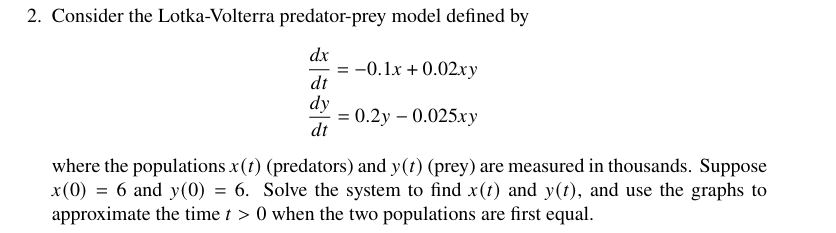

In [2]:
Image(filename='Screenshot 2025-03-01 214117.png')

In [3]:
def dsdt(t, s0):
    x, y = s0
    return [-0.1*x + 0.02*x*y,
             0.2*y - 0.025*x*y]

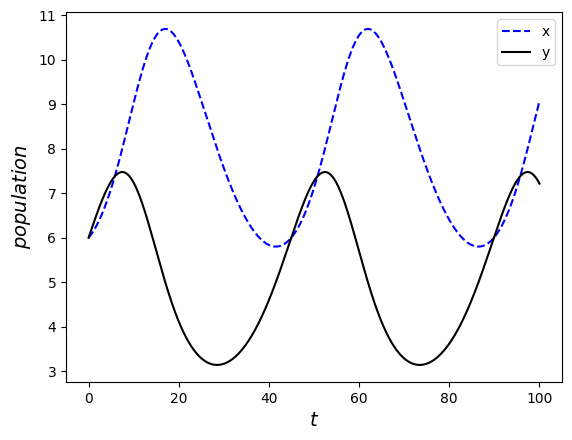

In [4]:
x0 = 6
y0 = 6
s0 = (x0, y0)
t = np.linspace(0, 100, 10000)
sol = odeint(dsdt, y0=s0, t=t, tfirst=True)
plt.figure()
plt.plot(t,sol[:,0], 'b--', label='x')
plt.plot(t,sol[:,1], 'k-', label='y')
plt.xlabel('$t$',fontsize=14)
plt.ylabel('$population$',fontsize=14)
plt.legend()
plt.show()

The numpy.argmin() method returns indices of the min element of the array in a particular axis. Find the index where the difference between x and y is closest to zero. 

Syntax :numpy.where(condition[, x, y]) 
Parameters 
condition: A condition that tests elements of the array.
x (optional): Values from this array will be returned where the condition is True.
y (optional): Values from this array will be returned where the condition is False.
Returns: If only the condition is provided, numpy.where() will return the indices of elements where the condition is true.

<h3>More accurate Approach</h3>

In [5]:
# (where the difference changes sign from positive to negative or vice versa)
diff = sol[:, 0] - sol[:, 1]
crossings = np.where(np.diff(np.signbit(diff)))[0]
crossing_times = t[crossings]

print(f"The populations are equal at times t = {crossing_times}")
print(f"First instance when populations are equal: t = {crossing_times[1]}")
print(f'Population at first instance is : {sol[np.where(t==crossing_times[1]),0][0][0]}')

The populations are equal at times t = [ 0.          5.81058106 44.94449445 50.76507651 89.8889889  95.70957096]
First instance when populations are equal: t = 5.810581058105811
Population at first instance is : 7.377937973909987


In [6]:
index = np.argmin(np.abs(sol[1:-1, 0] - sol[1:-1, 1]))
time_equal = t[index]
print(f"The populations are equal at time t = {time_equal}")

The populations are equal at time t = 50.75507550755076
